/var/folders/zs/r5tyhxm51xdd_t445wg7w9l00000gn/T/ipykernel_99148/1842242425.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df, x='n', y='score', hue='model', ci=95, capsize=.15)


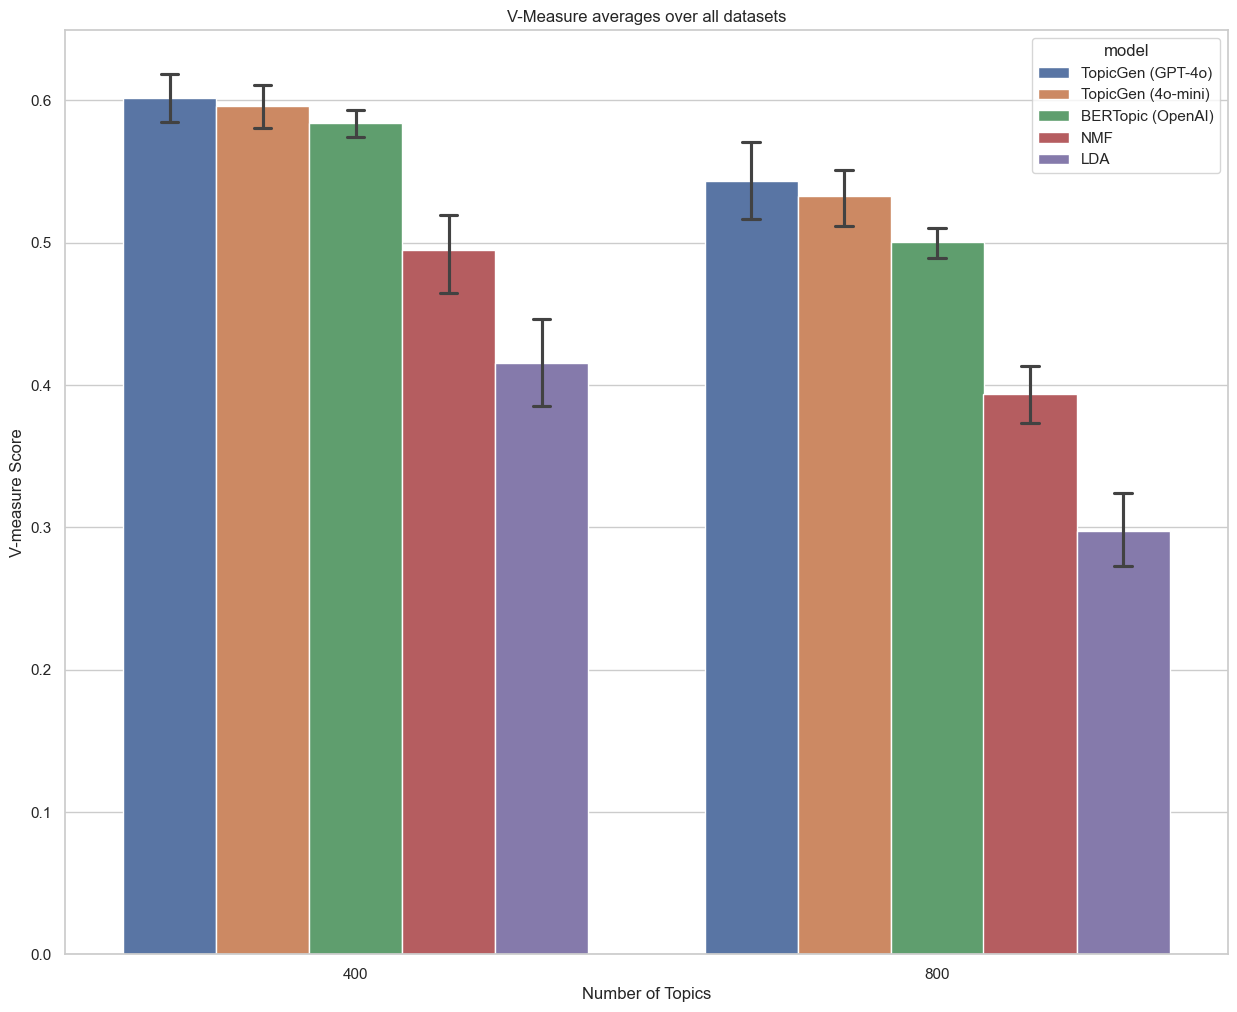

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns set theme
sns.set_theme(style="whitegrid")

n_options = [400, 800]
dataset = "NYT"
dfs = []

names = []
for dataset in ["NYT", "NEWSGROUPS", 'PUBMED', 'ARXIV']:
    for n in n_options[:4]:
        names.append(f'../data_out/coherence_scores_GenAIMethodOneShot_{n}_{dataset}.csv')
        df = pd.read_csv(f'../data_out/coherence_scores_GenAIMethodOneShot_{n}_{dataset}.csv')
        df['n'] = n
        df['model'] = 'TopicGen (GPT-4o)'
        df['dataset'] = dataset
        dfs.append(df)
        
    for n in n_options[:4]:
        names.append(f'../data_out/coherence_scores_GenAIMethodOneShotMini_{n}_{dataset}.csv')
        df = pd.read_csv(f'../data_out/coherence_scores_GenAIMethodOneShotMini_{n}_{dataset}.csv')
        df['n'] = n
        df['model'] = 'TopicGen (4o-mini)'
        df['dataset'] = dataset
        dfs.append(df)
        
    for n in n_options:
        names.append(f'../data_out/coherence_scores_BERTopicModel_{n}_{dataset}.csv')
        df = pd.read_csv(f'../data_out/coherence_scores_BERTopicModel_{n}_{dataset}.csv')
        df['n'] = n
        df['model'] = 'BERTopic (OpenAI)'
        df['dataset'] = dataset
        dfs.append(df)
    
    for n in n_options:
        names.append(f'../data_out/coherence_scores_NMFModel_{n}_{dataset}.csv')
        df = pd.read_csv(f'../data_out/coherence_scores_NMFModel_{n}_{dataset}.csv')
        df['n'] = n
        df['model'] = 'NMF'
        df['dataset'] = dataset
        dfs.append(df)

        
    for n in n_options:
        names.append(f'../data_out/coherence_scores_LDAGensimModel_{n}_{dataset}.csv')
        df = pd.read_csv(f'../data_out/coherence_scores_LDAGensimModel_{n}_{dataset}.csv')
        df['n'] = n
        df['model'] = 'LDA'
        df['dataset'] = dataset
        dfs.append(df)
        dfs.append(df)
        
df = pd.concat(dfs)

mask = df['metric_name'] == 'V_measure'
df = df[mask]

# make a barplot with errorbar ci 95
plt.figure(figsize=(15, 12))
ax = sns.barplot(data=df, x='n', y='score', hue='model', ci=95, capsize=.15)
# title
ax.set_title(f'V-Measure averages over all datasets')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('V-measure Score');